In [12]:
%load_ext autoreload
%autoreload 2

In [23]:
from src.llamma import LLAMMA
import matplotlib.pyplot as plt

In [24]:
class Oracle():
    def __init__(self):
        pass
    def price(self):
        return 1490

llamma = LLAMMA(100, 1500, Oracle(), 0)

In [25]:
n0 = llamma.active_band
llamma.deposit('Bob', 1000, n0+1, n0 + 8)
llamma.deposit('Alice', 767, n0+1, n0 + 3)

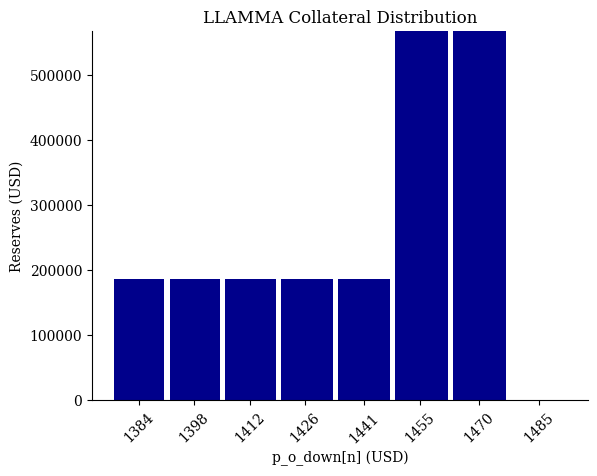

In [ ]:
llamma.plot_reserves()

In [ ]:
out_x, out_y = llamma.withdraw('Bob', 0.7)

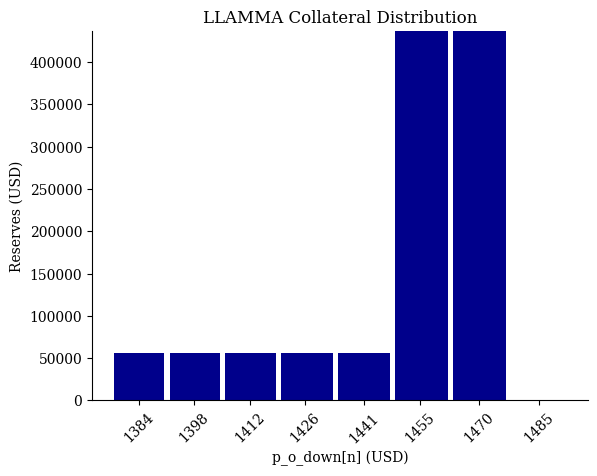

In [ ]:
llamma.plot_reserves()

In [ ]:
s = llamma._swap(500000, y_in=False)
s

Swap(
in_amount=500000
 out_amount=329.57538205290007
reserves=defaultdict(<function Swap.__init__.<locals>.<lambda> at 0x121223600>, {0: [0.0, 0.0], 1: [444206.8919343874, 0], 2: [55793.108065612614, 256.7579512804332]})
admin_fee=0.0
n1=0
n2=2)

In [ ]:
llamma.swap(500000, y_in=False)

(500000, 329.57538205290007)

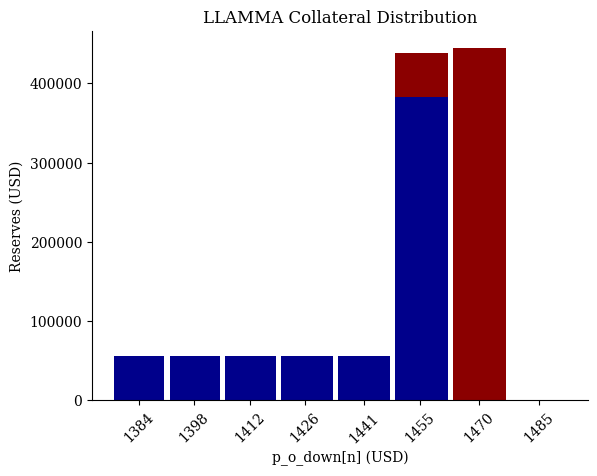

In [ ]:
llamma.plot_reserves()

In [ ]:
import pandas
import plotly.express as px

def calc_p_impact(x,y,original_swap_x,fee):
    if original_swap_x == 0: return 0
    k = x*y
    original_price = x/y
    swap_x = original_swap_x*(1-fee)
    new_x = x + swap_x
    new_y = k/new_x
    swap_y = y-new_y
    trade_price = swap_x/swap_y
    new_price = new_x/new_y

    return((trade_price-original_price)/original_price)


slippage = []
for i in range(1,100000):
    slippage+=[calc_p_impact(x=2e6,y=1e3,original_swap_x=i*100,fee=0)]

fig = px.line(x=[i*100 for i in range(1,100000)],y=slippage)
fig.show()

In [ ]:
# import plotly.express as px

# import pandas as pd
# import numpy as np
# import itertools

# # Create three numpy arrays
# array1 = np.array(range(-5,5))
# array2 = np.array(range(90,300,10))

# # Generate all possible combinations of the three arrays
# combinations = list(itertools.product(array1, array2))

# # Create a DataFrame from the combinations
# df = pd.DataFrame(combinations, columns=['Band', 'LTV'])
# df['Size'] = df["Band"] * df["LTV"]

# # Print the resulting DataFrame
# print(df)

# fig = px.scatter_3d(df, x='Tick', y='LTV', z='Band',color='Size')
# fig.show()
import plotly.graph_objects as go
import numpy as np

n=1000000
df = pd.DataFrame()
df["Band"] = np.random.normal(loc=10, scale=1, size=n).astype(int)  # For example, a 1D array of normally distributed data
df["LTV"] = np.random.normal(loc=150, scale=10, size=n).astype(int) # Another 1D array of normally distributed data
df["Size"] = np.random.normal(loc=1e3, scale=100, size=n).astype(int)
# df["UserGroup"] = ( (df["LTV"]/df["LTV"].max())*10 + abs(20-df["Band"]) )
df["UserGroup"] = ( (df["LTV"]/df["LTV"].max())*10 + abs(20-df["Band"]) )
df2 = df.groupby(["Band", "LTV"]).agg({"Size": "sum","UserGroup":"mean"}).reset_index()
pd.set_option('display.max_rows', None)

fig = go.Figure(data=go.Scatter3d(
    x=df2["Band"],
    y=df2["LTV"],
    z=df2["Size"],
    mode='markers',    
    marker=dict(
        size=5,
        # color = np.histogram2d(x_data, y_data, bins=500)[0].flatten()
        color=df2["UserGroup"],  # set color to the histogram values
        colorscale='Blackbody',   # choose a colorscale
        opacity=.8,
    )
))


fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis_title='Band',
        yaxis_title='LTV',
        zaxis_title='Size'
    ),
    scene_aspectmode='cube',
    margin=go.layout.Margin(
        l=5,  # Left margin
        r=5,  # Right margin
        b=0,  # Bottom margin
        t=0,  # Top margin
    ),
    width=1000,
    height=600,
    xaxis=dict(
        dtick=.1,  # Tick spacing of 1 unit
        tickwidth=2
    ),
    yaxis=dict(
        dtick=5,  # Tick spacing of 5 units
        tickwidth=2
    )
)

fig.show()


In [ ]:
# import plotly.express as px

# import pandas as pd
# import numpy as np
# import itertools

# # Create three numpy arrays
# array1 = np.array(range(-5,5))
# array2 = np.array(range(90,300,10))

# # Generate all possible combinations of the three arrays
# combinations = list(itertools.product(array1, array2))

# # Create a DataFrame from the combinations
# df = pd.DataFrame(combinations, columns=['Band', 'LTV'])
# df['Size'] = df["Band"] * df["LTV"]

# # Print the resulting DataFrame
# print(df)

# fig = px.scatter_3d(df, x='Tick', y='LTV', z='Band',color='Size')
# fig.show()
import plotly.graph_objects as go
import numpy as np

n=10000
df = pd.DataFrame()
df["Center Band"] = np.random.normal(loc=10, scale=1, size=n).astype(int)  # For example, a 1D array of normally distributed data
df["Band Width"] = np.random.normal(loc=3, scale=1, size=n).astype(int)  
df["LTV"] = np.random.normal(loc=150, scale=10, size=n).astype(int) # Another 1D array of normally distributed data
df["Size"] = np.random.normal(loc=1e6, scale=100, size=n).astype(int)

df["UserGroup"] = ( (df["LTV"]/df["LTV"].max())*10 + abs(20-df["Center Band"]) )
# df2 = df.groupby(["Center Band","Band Width","LTV"]).agg({"Size": "sum","UserGroup":"mean"}).reset_index()
pd.set_option('display.max_rows', None)

fig = go.Figure(data=go.Scatter3d(
    x=df["Center Band"],
    y=df["LTV"],
    z=df["Band Width"],
    mode='markers',    
    marker=dict(
        size=np.log(df['Size']),
        # color = np.histogram2d(x_data, y_data, bins=500)[0].flatten()
        color=df["UserGroup"],  # set color to the histogram values
        colorscale='Blackbody',   # choose a colorscale
        opacity=.8,
    )
))


fig.update_layout(
    title='3D Scatter Plot',
    scene=dict(
        xaxis_title='Center Band',
        yaxis_title='LTV',
        zaxis_title='Band Width'
    ),
    scene_aspectmode='cube',
    margin=go.layout.Margin(
        l=5,  # Left margin
        r=5,  # Right margin
        b=0,  # Bottom margin
        t=0,  # Top margin
    ),
    width=1000,
    height=600,
    xaxis=dict(
        dtick=.1,  # Tick spacing of 1 unit
        tickwidth=2
    ),
    yaxis=dict(
        dtick=5,  # Tick spacing of 5 units
        tickwidth=2
    )
)

fig.show()


Total collateral: 60 Mns USD
Total debt: 40 Mns USD


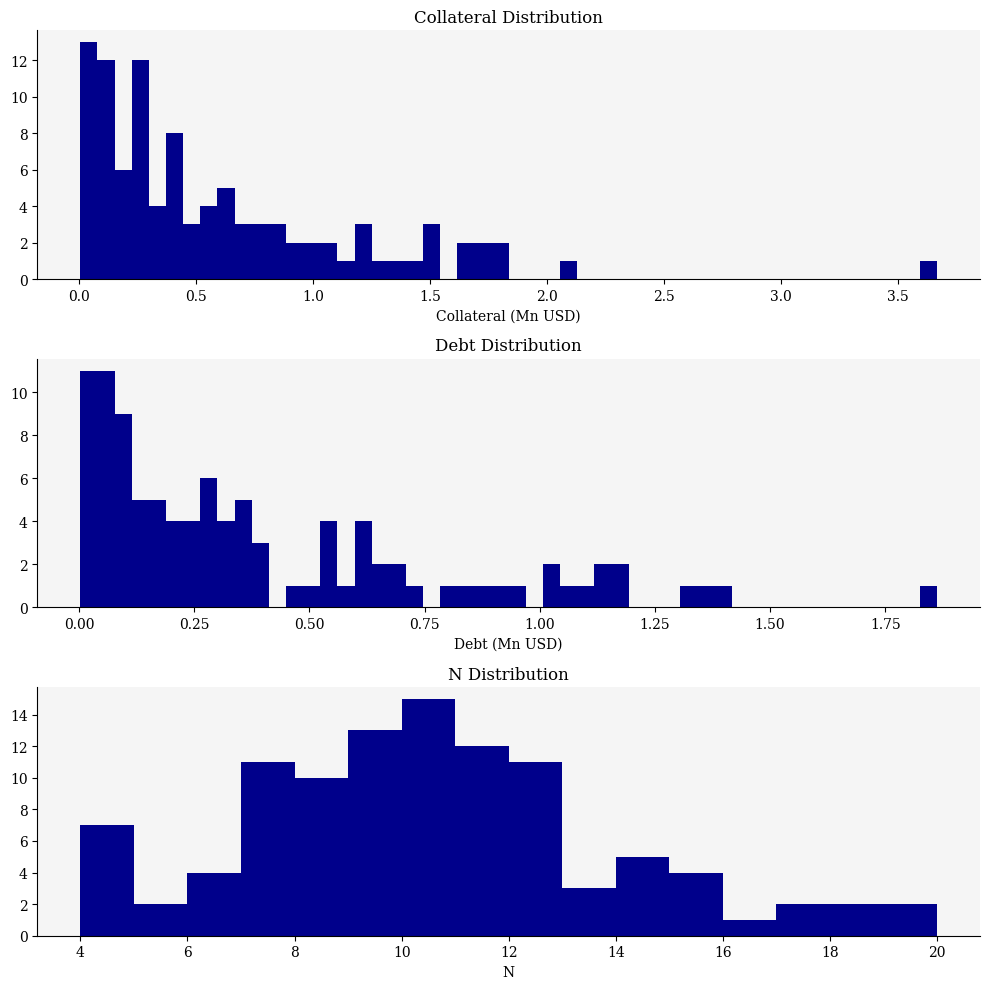

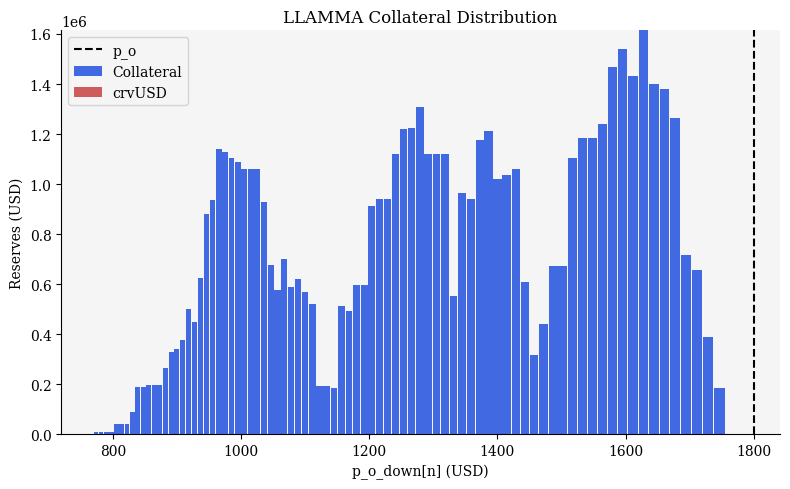

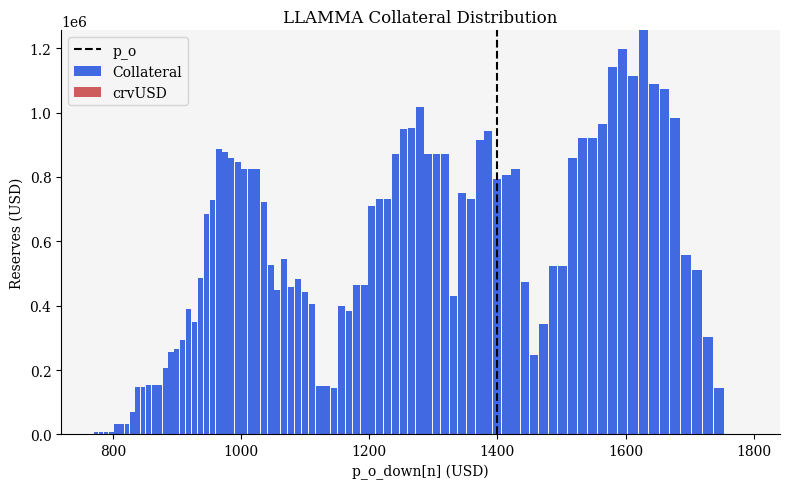

In [3]:
from src.llamma import LLAMMA
from src.controller import Controller
from src.oracle import Oracle
from src.mpolicy import MonetaryPolicy
from src.liquidator import Liquidator
import pandas as pd
import numpy as np
from datetime import datetime
from src.utils import _plot_borrowers, gen_gbm

WINDOW = 600 # 10 minutes
BASE_PRICE = 1800
A = 100
FEE = 0.006
ADMIN_FEE = 1
LOAN_DISCOUNT = 0.09
LIQUIDATION_DISCOUNT = 0.06

N_BORROWERS = 100
VALUE = 60_000_000 # USD value of collateral
COINS = 60_000_000 / BASE_PRICE # Number of collateral coins
DEBT = 44_000_000 # crvUSD debt

TOLERANCE = 0 # Min profit for liquidator to act

START = int(datetime.now().timestamp())

oracle = Oracle(WINDOW)
oracle.update(START, BASE_PRICE) # set initial price
llamma = LLAMMA(A, BASE_PRICE, oracle, FEE, admin_fee=ADMIN_FEE)
mpolicy = MonetaryPolicy()
controller = Controller(llamma, mpolicy, LOAN_DISCOUNT, LIQUIDATION_DISCOUNT) 
liquidator = Liquidator(TOLERANCE)

borrowers = controller.gen_borrowers(N_BORROWERS, COINS, v=True)
_plot_borrowers(borrowers, BASE_PRICE)

for i, b in enumerate(borrowers):
    # Deposit!
    controller.create_loan(i, *b)

llamma.plot_reserves()

# Now let's create some dummy prices and assume that liquidators
# will liquidate when profitable.

WINDOW = 3600 # 1 hrs # NOTE this is way longer than the actual contract
PERIOD = 86400 # 1 day

times = [int(START + dt*60) for dt in range(0, PERIOD//60)]

df = pd.DataFrame(columns=['timestamp', 'spot', 'oracle', 'liquidation_pnl'])
df['timestamp'] = times
df.index = pd.to_datetime(df['timestamp'], unit='s')
df['spot'] = gen_gbm(S0=BASE_PRICE,mu=0.05, sigma=0.2, dt=1/1440,T=1)
df.head()

oracle.update(START + 60 * 100, 1400)
llamma.plot_reserves()

# everything above band 24 (i.e. < 24) should be in stablecoin
for i in range(24, 0, -1):
    amt = llamma.bands_y[i] 
    llamma.bands_x[i] = amt * llamma.p_o
    llamma.bands_y[i] = 0

amt = llamma.bands_x[24]
llamma.bands_x[24] = amt / 2
llamma.bands_y[24] = amt / 2 / llamma.p_o